In [23]:
import torch
from d2l import torch as d2l

import os
import pandas as pd
import torch
import torchvision

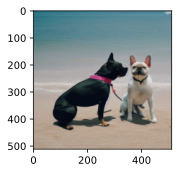

In [24]:
d2l.set_figsize()
img = d2l.plt.imread('../data/images/dogdog.png')
d2l.plt.imshow(img);

In [25]:
dog_bbox1, dog_bbox2 = [60.0, 150.0, 350., 450.], [320, 140.0, 455.0, 430.0]
boxes = torch.tensor((dog_bbox1, dog_bbox2))
d2l.box_center_to_corner(d2l.box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

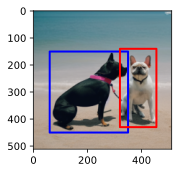

In [26]:
def bbox_to_rect(bbox, color):
    return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0],
                             height=bbox[3]-bbox[1], fill=False, edgecolor=color,
                             linewidth=2)

fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox1, 'blue'))
fig.axes.add_patch(bbox_to_rect(dog_bbox2, 'red'));

In [27]:
d2l.DATA_HUB['banana-detection'] = (d2l.DATA_URL + 'banana-detection.zip',
                                      '5de26c8fce5ccdea9f91267273464dc968d20d72')

In [32]:
def read_data_bananas(is_train=True):
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir, 'bananas_train' if is_train
                             else 'bananas_val', 'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name')
    images, targets = [], []
    for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if is_train else 'bananas_val',
                         'images', f'{img_name}')))
        targets.append(list(target))
    return images, torch.tensor(targets).unsqueeze(1) / 256

In [33]:
class BananasDataset(torch.utils.data.Dataset):
    def __init__(self, is_train):
        self.features, self.labels = read_data_bananas(is_train)
        print('read ' + str(len(self.features)) + (f'train' if is_train else 'validation') + ' examples')

    def __getitem__(self, idx):
        return (self.features[idx].float(), self.labels[idx])

    def __len__(self):
        return len(self.features)

In [34]:
def load_data_bananas(batch_size):
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True), batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False), batch_size)
    return train_iter, val_iter

In [35]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
batch[0].shape, batch[1].shape

read 1000train examples
read 100validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

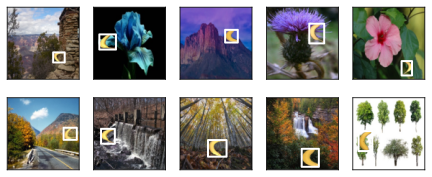

In [36]:
imgs = (batch[0][0:10].permute(0, 2, 3, 1)) / 255
axes = d2l.show_images(imgs, 2, 5).flatten()
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])

In [37]:
img = d2l.plt.imread('../data/images/catdog.jpg')
h, w = img.shape[0:2]
h, w

(561, 728)